<a href="https://colab.research.google.com/github/Harsha-7989/regressions/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('/content/kc_house_data.csv')

In [22]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Cleaning Data

In [23]:
# pip install --upgrade matplotlib

In [24]:
data = data.drop(['date', 'zipcode'], axis = 1)

<Axes: >

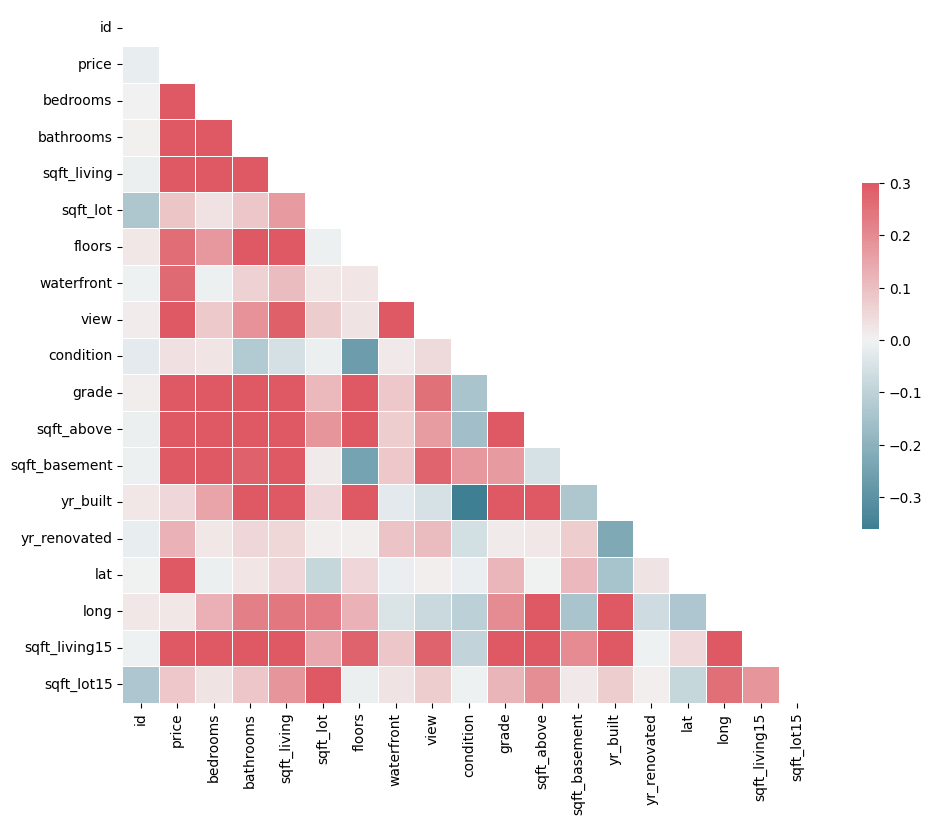

In [25]:
corr = data.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))


cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'condition', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = data[features]
y = data.price

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df.head()

Mean Absolute Error: 125002.07442245656
Mean Squared Error: 43690646677.91405
Root Mean Squared Error: 209023.0769028005


,Actual,Predicted
17384,297000.0,3.872015e+05
722,1578000.0,1.502715e+06
2680,562100.0,5.274534e+05
18754,631500.0,5.779358e+05
14554,780000.0,9.993390e+05


Text(0, 0.5, 'Predicted prices')

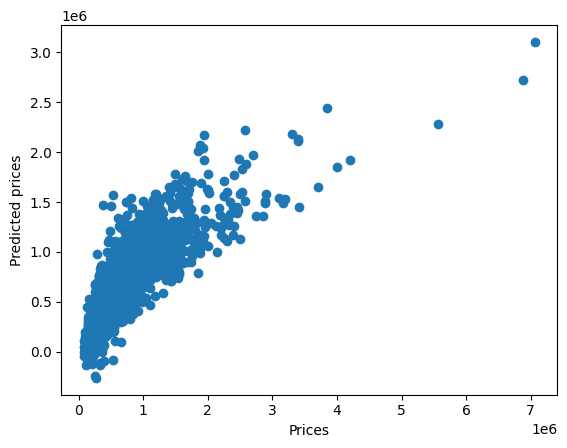

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

the performance is poor but to some extent, the model was able to give an estimate of the price. As it can be seen in the first five predictions, for example, our model predicted the price of a house to be 1,502,715 but the actual price of the house was 1,578,000. This is relatively fine to give a very rough estimate but there is a huge scope for improvement.

In [31]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNet
from sklearn.model_selection import cross_val_score

In [32]:
#Implementation of LassoCV
lasso = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
print("Root Mean Squared Error (Lasso): ", np.sqrt(-cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285549242130011.94, tolerance: 204936331764.4718
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283590901705994.25, tolerance: 204936331764.4718
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283393108639152.75, tolerance: 204936331764.4718
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Convergence

Root Mean Squared Error (Lasso):  203418.22857312456


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.618e+14, tolerance: 2.607e+11
  model = cd_fast.enet_coordinate_descent(


Root Mean Squared Error (Lasso):  203418.22857312456

In [33]:
#Implementation of ElasticNet
elastic = ElasticNet(alpha=0.001)
print("Root Mean Squared Error (ElasticNet): ", np.sqrt(-cross_val_score(elastic, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.985e+14, tolerance: 2.600e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.943e+14, tolerance: 2.571e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.071e+14, tolerance: 2.662e

Root Mean Squared Error (ElasticNet):  203442.40673916906


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.985e+14, tolerance: 2.607e+11
  model = cd_fast.enet_coordinate_descent(


Root Mean Squared Error (ElasticNet):  203442.40673916906

In [34]:
#Implementation of RidgeCV
ridge = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
print("Root Mean Squared Error (Ridge): ", np.sqrt(-cross_val_score(ridge, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

Root Mean Squared Error (Ridge):  203446.45882450786


he best we could reduce error to is 203,418 using Lasso.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:05:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Root Mean Squared Error (Xgboost):  127577.05689687358


Text(0.5, 1.0, 'xgboost')

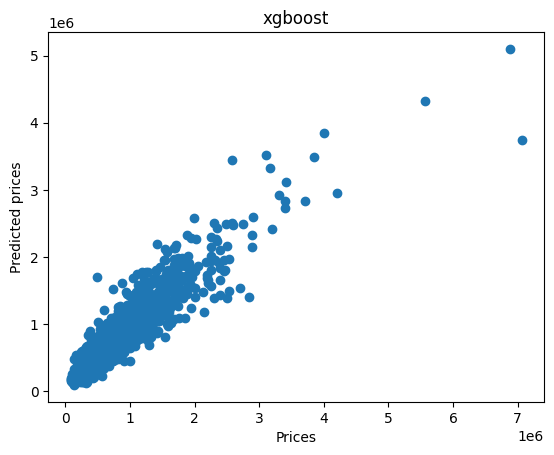

In [35]:
  #Implementation of xgboost
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.01, max_depth=4, min_child_weight=1.5, n_estimators=7200, reg_alpha=0.9, reg_lambda=0.6, subsample=0.2, seed=42, silent=1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Root Mean Squared Error (Xgboost): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("xgboost")

That’s a significant improvement from our previous models. So far, xgboost has turned out to be the best model to solve this problem. xgboost is a fast and more robust library that can give high performance in prediction problems.

In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
17384,297000.0,2.881682e+05
722,1578000.0,1.745258e+06
2680,562100.0,5.223157e+05
18754,631500.0,5.944428e+05
14554,780000.0,6.926412e+05
